In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df_crimes = pd.read_csv('../crime_outcomes_all.csv', index_col=0)
#df_stop_search = pd.read_csv('../Astraea/2018-01/2018-01-cleveland-stop-and-search.csv')
#df_street = pd.read_csv('../crime_street_all.csv', index_col=0)

/home/gdp/miniconda3/envs/py3iaml/lib/python3.7/site-packages/numpy/lib/arraysetops.py:518: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df_crimes.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Outcome type'],
      dtype='object')

In [4]:
df_crimes.drop(labels='Falls within', axis=1, inplace=True)
df_crimes.drop(labels='LSOA name', axis=1, inplace=True)

In [64]:
df_lsoa_crimes = df_crimes.groupby('LSOA code').count()
df_lsoa_crimes.drop(labels='Crime ID', axis=1, inplace=True)
df_lsoa_crimes.drop(labels='Longitude', axis=1, inplace=True)
df_lsoa_crimes.drop(labels='Latitude', axis=1, inplace=True)
df_lsoa_crimes.drop(labels='Reported by', axis=1, inplace=True)
df_lsoa_crimes.drop(labels='Outcome type', axis=1, inplace=True)
df_lsoa_crimes.drop(labels='Location', axis=1, inplace=True)

In [65]:
df_pop = pd.read_csv('population-density.csv')
#df_pop.drop(labels='LSOA name',axis=1, inplace=True)
df_pop.columns


Index(['LSOA code', 'LSOA name', 'Mid-2017 population', 'Area Sq Km',
       'People per Sq Km'],
      dtype='object')

In [66]:
df_lsoa_crimes = df_lsoa_crimes.merge(df_pop, how='inner', on='LSOA code')

In [67]:
df_urban = pd.read_csv('Rural_Urban_conv.csv')
df_lsoa_crimes=df_lsoa_crimes.merge(df_urban, how='inner', on='LSOA code')

In [68]:
df_lsoa_crimes['Mid-2017 population'] = df_lsoa_crimes['Mid-2017 population'].str.replace(',', '')
df_lsoa_crimes['People per Sq Km'] = df_lsoa_crimes['People per Sq Km'].str.replace(',', '')

In [69]:
df_lsoa_crimes['crime_rate'] = df_lsoa_crimes.apply(lambda x: x['Month']/float(x['Mid-2017 population']), axis=1)
df_lsoa_crimes.head()

,LSOA code,Month,LSOA name,Mid-2017 population,Area Sq Km,People per Sq Km,Urban,crime_rate
0,E01000001,226,City of London 001A,1375,0.13,10593,1,0.164364
1,E01000002,179,City of London 001B,1316,0.23,5762,1,0.136018
2,E01000003,21,City of London 001C,1497,0.06,25330,1,0.014028
3,E01000005,369,City of London 001E,1438,0.19,7584,1,0.256606
4,E01000006,47,Barking and Dagenham 016A,2043,0.15,13936,1,0.023005


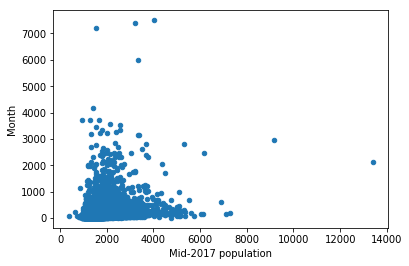

In [70]:
df_lsoa_crimes['Mid-2017 population'] = pd.to_numeric(df_lsoa_crimes['Mid-2017 population'])
df_lsoa_crimes.plot.scatter(x='Mid-2017 population', y='Month')

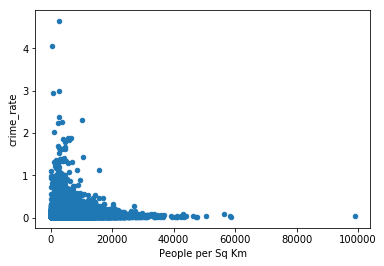

In [71]:
df_lsoa_crimes['People per Sq Km'] = pd.to_numeric(df_lsoa_crimes['People per Sq Km'])
df_lsoa_crimes.plot.scatter(x='People per Sq Km', y='crime_rate')

In [74]:
max(df_lsoa_crimes['crime_rate'])
df_lsoa_crimes.rename(columns={'People per Sq Km':'pop_density'}, inplace=True)
df_lsoa_crimes.pop_density.idxmax()

31945

In [75]:
df_lsoa_crimes.iloc[[31945]]

,LSOA code,Month,LSOA name,Mid-2017 population,Area Sq Km,pop_density,Urban,crime_rate
31945,E01032773,128,Tower Hamlets 032D,3347,0.03,99024,1,0.038243


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7825f82ffb70>]],
      dtype=object)

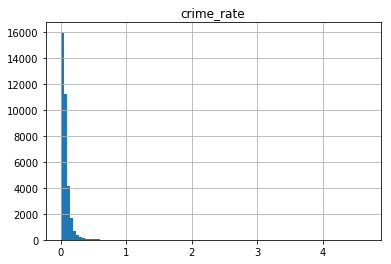

In [59]:
df_lsoa_crimes.hist(column='crime_rate', bins=100)


In [ ]:
dat = df_crimes.groupby('Month').count()['Crime ID']

In [ ]:
dat.plot()

# Crime outcomes data

In [ ]:
df_crimes.head()

In [ ]:
df_crimes.groupby('Outcome type').count().sort_values('Month', ascending=False)['Month']

### Plotting example with Altair

In [ ]:
alt.Chart(df_crimes[:4000]).mark_point().encode(
    x='LSOA name',
    y='Outcome type'
)

# Stop and s

In [ ]:
df_stop_search.head()

# Street crimes data

In [ ]:
df_street.tail()

# Querying the API for the same data

In [ ]:
api = PoliceAPI()
api.get_forces()